################################################################################
############################   Starting evolution    ###########################
################################################################################
                                                                                
                 ------------Evaluated 1000 items------------             


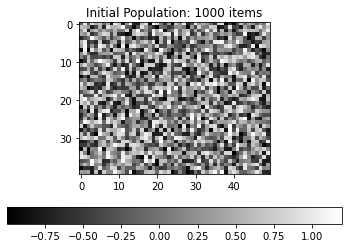

                                                                                 
---------------------------   Population sample   ---------------------------
[-0.1700309203111925, 0.9742596492255216]
[-0.2508294862546221, 0.8764889420354589]
[0.49902653066911395, 0.6663567975604341]
[-0.04976859622272034, 0.38703701176447103]
[-0.7956535799779698, 1.0348797579479336]
[0.7031091828008527, -0.7475158529021331]
[0.24814912099094988, 1.0741591258258776]
[-0.6636438787144121, -0.7260325938687404]
[0.5997418376592767, 0.9634971255474394]
[-0.9887509648703598, 1.169453010403926]
[0.8433868868593364, 0.02428761930097889]
[-0.5212546726867409, 0.33016364909806617]
[-0.9146452611580911, 0.6693405714548657]
[0.219836980972421, 1.0522136899015782]
[-0.720285570809492, -0.2660583320404253]
[0.9966815624634262, 0.269611580653341]
[0.4844997289990729, 0.2801325905206571]
[-0.13070967257056187, -0.5679926582541697]
[0.8144949631907756, 0.9626755458344678]
[-0.9538838562269094, -0.5035360365109636]
 

---------Evaluated 645 individuals---------
                                                                                         
Minimum in population (fitness): -33.9993779025955
Maximum in population: -29.04004928447361
Average: -33.593
Std: 0.5304
                                        
                                        
-------------- Generation 22 -------------
---------Evaluated 607 individuals---------
                                                                                         
Minimum in population (fitness): -33.99957518374604
Maximum in population: -31.339978550864267
Average: -33.7941
Std: 0.2697
                                        
                                        
-------------- Generation 23 -------------
---------Evaluated 611 individuals---------
                                                                                         
Minimum in population (fitness): -33.99957518374604
Maximum in population: -32.74695501538049
Average

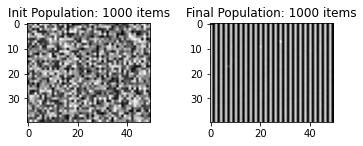

In [3]:
# -*- coding: cp1252 -*-

from deap import base,creator,algorithms,tools
import matplotlib.pyplot as plt
import random
import numpy as np
  

creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 
creator.create("Individual", list, fitness=creator.FitnessMin) 
toolbox = base.Toolbox()

def ind_population():
    ind = creator.Individual()
    ind.append(random.uniform(-1,1))
    ind.append(random.uniform(-0.8,1.2))
    return ind

toolbox.register("individual", ind_population) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def z_func(X):                            #function to minimize
      x = X[0]
      y = X[1]
      return 0.5*pow(x,2)+pow(y,2)-x*y-2*x-6*y, 


toolbox.register("evaluate", z_func)
toolbox.register("mate", tools.cxBlend, alpha=0.9)                              
toolbox.register("mutate", tools.mutGaussian,mu=0.3,sigma=0.1, indpb=0.01)  
toolbox.register("select", tools.selTournament, tournsize=3)  

def main():
    random.seed(64)
    old_pop = toolbox.population(n=1000) 
    pop = toolbox.population(n=1000)     #Population: n = 1000 individuals
    CXPB, MUTPB, NGEN = 0.5, 0.2, 30     #Crossover, Mutation and number of generations
    print  ('################################################################################')
    print (u'############################   Starting evolution    ###########################')
    print  ('################################################################################')
    print  ('                                                                                ')
    #evaluate population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("                 ------------Evaluated %i items------------             " % len(pop))
    plt.gray()
    plt.title(u"Initial Population: {0} items".format(len(pop)))
    plt.imshow(np.asarray(pop).reshape(40,50))    #list of items (individuals)
    
    plt.colorbar(orientation = 'horizontal')
    plt.show()
    print ('                                                                                 ')
    print (u'---------------------------   Population sample   ---------------------------')
    for i in range(20):
        print (pop[i])
    #print(u"Población primitiva: \n\n {0} \n\nCantidad de individuos: {1} \n".format(pop, len(pop)))
    
    # Begin the evolution
    for g in range(NGEN):
        print ('                                        ')
        print( '                                        ')
        print(u"-------------- Generation %i -------------" % (g+1))
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print("---------Evaluated %i individuals---------" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        print ('                                                                                         ')
        print(u"Minimum in population (fitness): {0}\nMaximum in population: {1}\nAverage: {2}\nStd: {3}".
              format(min(fits),max(fits),round(mean,4),round(std,4)))
    print ('                                                                                             ')
    print ('                                                                                             ')
    print(u"######################### End of evolution #########################")
    print( '                                                                                             ')
    print ('                                                                                             ')
    best_ind = tools.selBest(pop, 1)[0]
    print("Best solution: {0}\n\nFitness: {1}".format(best_ind, best_ind.fitness.values[0]))
    print( '                                                                                             ')
    print( '                                                                                             ')
    plt.subplot(2,2,1)
    plt.title(u"Init Population: {0} items".format(len(old_pop)))
    plt.imshow(np.asarray(old_pop).reshape(40,50))
   
    
    plt.subplot(2,2,2)
    plt.title(u"Final Population: {0} items".format(len(pop))) #len(invalid_ind)
    print('                                  ')
    plt.hist(np.asarray(pop).reshape(20,100).flatten(), 500, range=(-1.4,1.2), fc='k', ec='k')
    plt.imshow(np.asarray(pop).reshape(40,50))
    

    
    plt.show()
    #graficar(best_ind[0], best_ind[1])
    
if __name__ == "__main__":
    main()


